### **Laboratorio #1** 
**ISIS 3301 - Business Inteligence** 

**Ronald Yesid Diaz Pardo - 202111309 - r.diazp**


**Andres Felipe Guerrero Sarmiento - 202015143 - a.guerreros**


Lorem - ### 

### A. Entendimiento de datos

En esta etapa es importante saber si los datos son o no suficientes para el alcance del proyecto y, en caso de serlo, entender bien sus características para poder definir el camino de limpieza y preparación para lograr el objetivo del proyecto.
En particular, deben incluir cuántos datos se tienen (filas y columnas) y los tipos de variables. Es importante realizar un perfilamiento completo   que incluya estadística descriptiva y gráficos sobre los datos, señalando sus principales estadísticos: media, varianza, desviación estándar, etc., para el caso de las columnas numéricas. En caso de datos categóricos recuerde que es importante conocer las categorías y en qué proporción se presentan. Tener en cuenta que una parte importante de esta etapa está relacionada con el análisis a nivel de calidad de datos y, en particular, a nivel de las dimensiones de calidad (completitud, unicidad, consistencia, validez) para identificar las actividades de preparación que requieren los datos.

**0. Cargar data**

In [2]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()  # for plot styling

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D # for 3D plots


C:\Users\Andre\AppData\Local\Temp\ipykernel_13684\4057024315.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
data_file = "../data/data.csv"
data = pd.read_csv(data_file)
print(data)

     CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8956  C19186    28.493517           1.000000     291.12              0.00   
8957  C19187    19.183215           1.000000     300.00              0.00   
8958  C19188    23.398673           0.833333     144.40              0.00   
8959  C19189    13.457564           0.833333       0.00              0.00   
8960  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0       

**1. Cuantos datos se tienen (filas y columnas) y los tipos de variables**

In [4]:
print("Number of rows: ", data.shape[0])
print("Number of columns: ", data.shape[1])

print("\n\n", data.head())

Number of rows:  8961
Number of columns:  18


   CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8961 entries, 0 to 8960
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8961 non-null   object 
 1   BALANCE                           8961 non-null   object 
 2   BALANCE_FREQUENCY                 8961 non-null   float64
 3   PURCHASES                         8961 non-null   float64
 4   ONEOFF_PURCHASES                  8961 non-null   float64
 5   INSTALLMENTS_PURCHASES            8961 non-null   float64
 6   CASH_ADVANCE                      8951 non-null   float64
 7   PURCHASES_FREQUENCY               8961 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8948 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8961 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8961 non-null   float64
 11  CASH_ADVANCE_TRX                  8961 non-null   int64  
 12  PURCHA

**2. Gráficos sobre los datos, señalando sus principales estadísticos: media, varianza, desviación estándar, etc.**

2.1 Perfilamiento de los datos

Estadistica descriptiva

In [6]:
data.describe()

,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8961.000000,8961.000000,8961.000000,8961.000000,8951.000000,8961.000000,8948.000000,8961.000000,8961.000000,8961.000000,8961.000000,8954.000000,8961.000000,8648.000000,8961.000000,8961.000000
mean,0.877337,1002.463128,591.909000,410.853942,975.911735,0.490390,0.205296,0.364427,0.135100,3.247071,14.701149,4492.107229,1732.346476,863.799380,0.153667,11.504520
std,0.236860,2135.454287,1658.954815,903.861664,2092.854438,0.401300,0.343200,0.397426,0.200037,6.820915,24.844201,3638.086840,2893.903128,2371.003422,0.292467,1.469939
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.456400,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,-29.000000
25%,0.888889,39.800000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1562.500000,383.282850,169.163545,0.000000,12.000000
50%,1.000000,361.730000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,855.843792,312.684092,0.000000,12.000000
75%,1.000000,1109.830000,576.000000,468.650000,1112.868860,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1899.738286,825.496463,0.142857,12.000000
max,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,9.666670,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


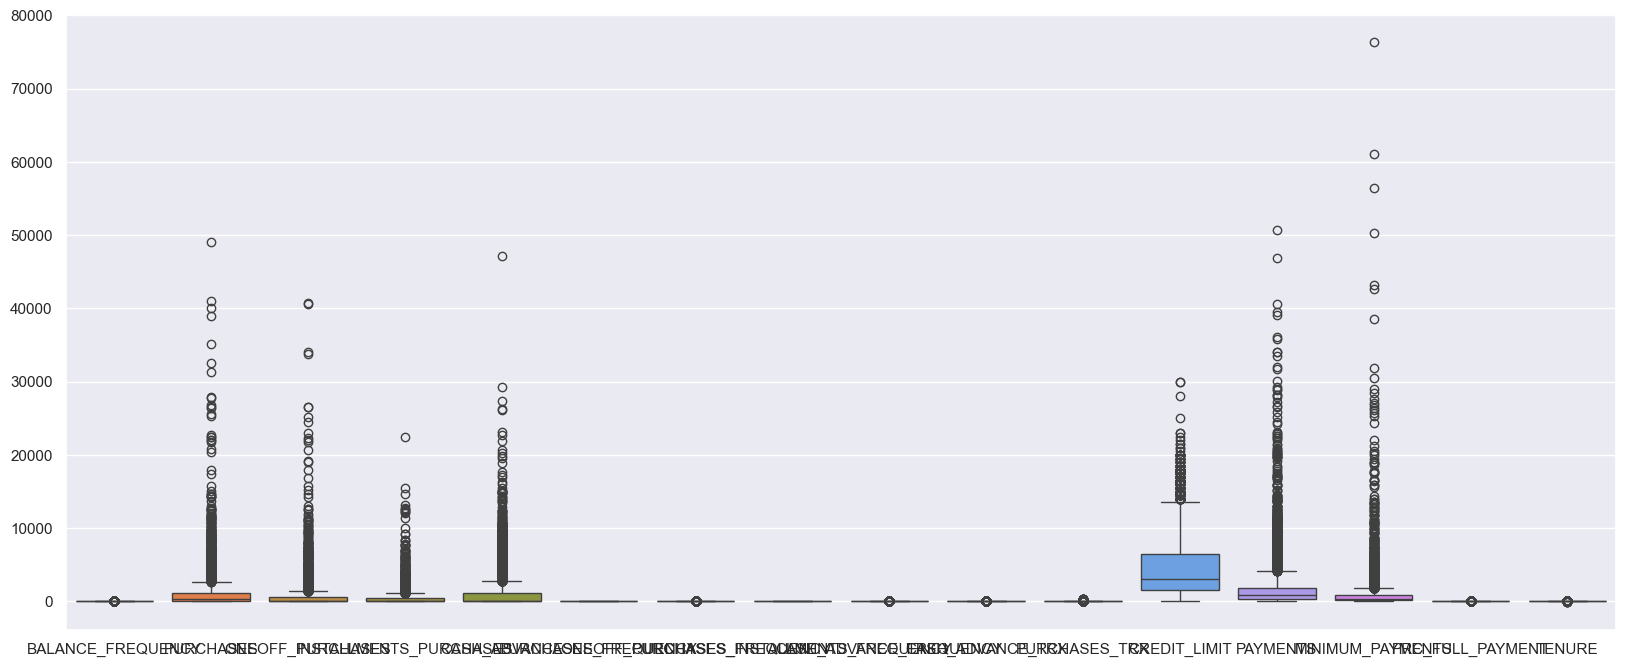

In [7]:
fig = plt.figure(figsize=(20, 8))
ax = sns.boxplot(data=data, orient="v")

Separacion de datos de int64, float64 y datos no numericos

In [8]:
float_cols = data.select_dtypes(include=['float64']).columns
int_cols = data.select_dtypes(include=['int64']).columns
categoric_cols = data.select_dtypes(include=['object']).columns

Visualizacion de columnas tipo float64

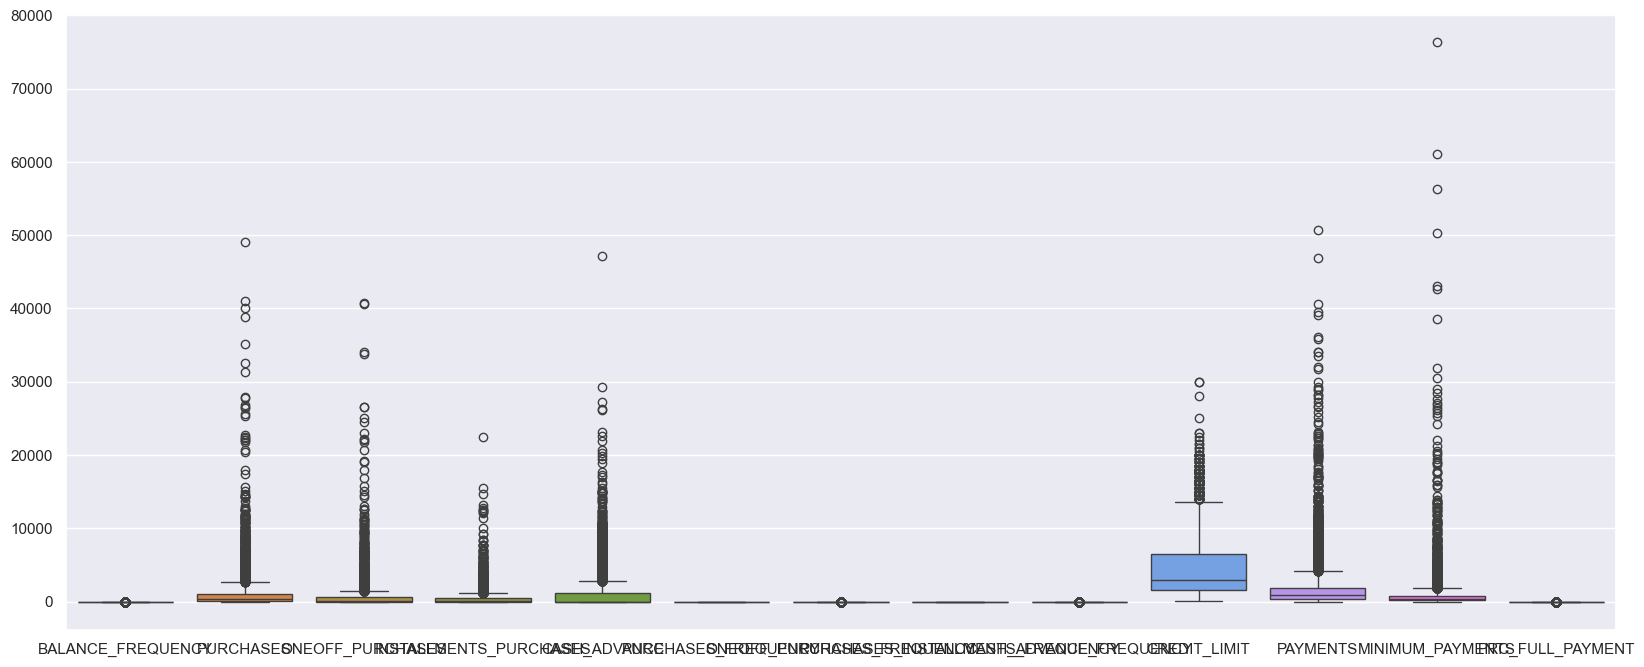

In [9]:
fig = plt.figure(figsize=(20, 8))
ax = sns.boxplot(data=data[float_cols], orient="v")

Visualizacion de columnas tipo int64

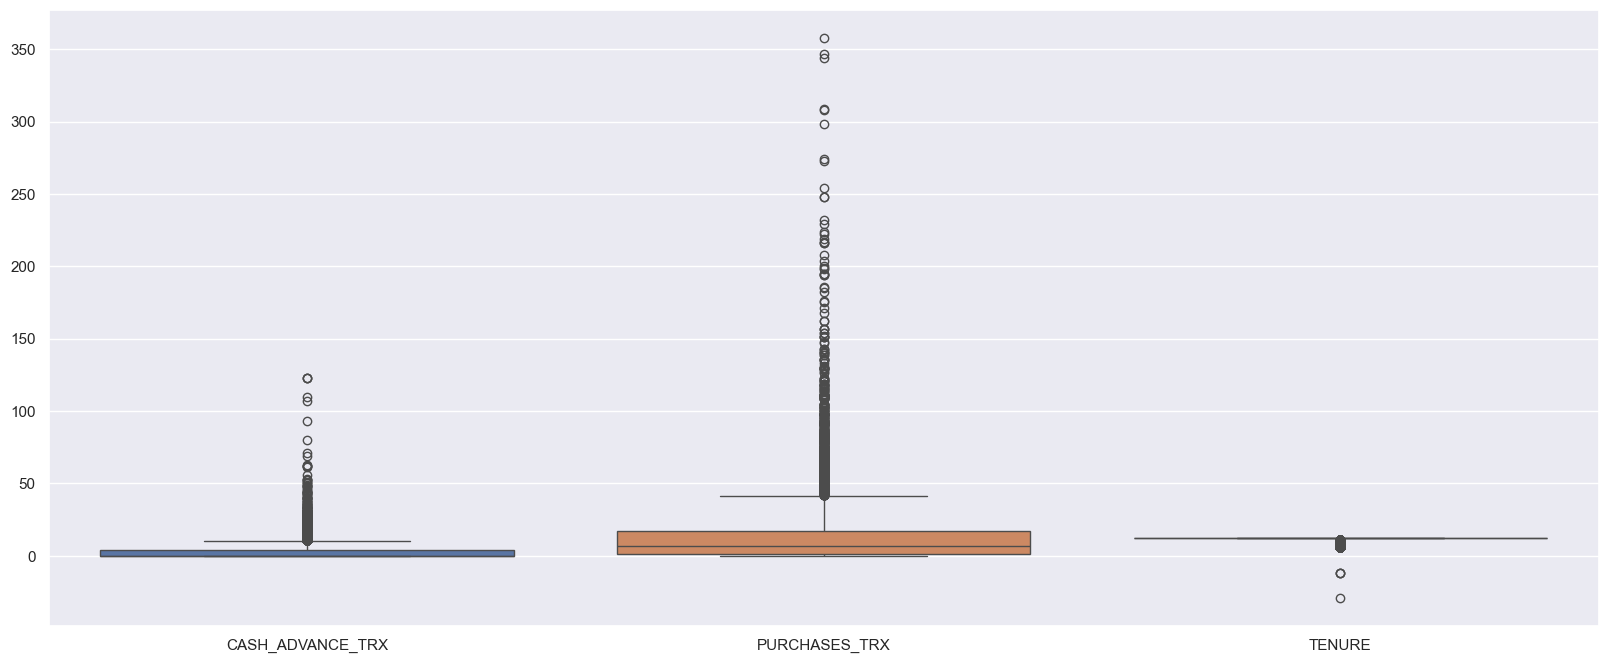

In [10]:
fig = plt.figure(figsize=(20, 8))
ax = sns.boxplot(data=data[int_cols], orient="v")

Visualizacion de columnas tipo categoricas

In [11]:
 # Datos categoricos
categoric_cols

Index(['CUST_ID', 'BALANCE'], dtype='object')

In [12]:
data[categoric_cols].describe()

,CUST_ID,BALANCE
count,8961,8961
unique,8950,8871
top,C10298,0
freq,4,80


**Observacion**: identificamos que ninguna de las variables del modelo tiene un comportamiento categorico, es decir, que sus valores esten dentro de un conjunto de valores predefinidos.

Dentro de los datos se podria decir que la columna Tenure podria ser una categorica debido a que tiene unos pocos valores unicos dentro del dataset que suelen repetirse, no obstante, conceptualmente esta se refiere a la cantidad de meses como cliente de una persona, por lo que no puede ser considerado como categorica y por lo tanto el dataset no tiene columnas categoricas en el sentido de su definicion, siendo estas columnas "categoricas" aquellas que tienen un conjunto predefinido de valores posibles y cuyos valores se relacionan con el mundo real conceptualmente.

### 3. Analisis de calidad de datos y preparacion de datos

Análisis a nivel de calidad de datos y, en particular, a nivel de las dimensiones de calidad (completitud, unicidad, consistencia, validez) para identificar las actividades de preparación que requieren los datos.

**3.1 Consistencia**

Que los datos sean consistentes con lo que buscan representar.

En este caso nos interesa verificar la consistencia de lo siguiente: 

- Todas las columnas a excepcion de la de CUST_ID sea de tipo numerica (INT64 o FLOAT64): (ejemplo) las columnas de BALANCE y PUCHARSES no cumplen esto y tienen datos no congruentes como una fecha.

- Valores dentro de rangos adecuados: existen "outliers" (valores excesivamente grande en comparacion a la mayoria de los demas) en columnas como la de BALANCE que podrian alterar nuestro modelo.

- Las columnas de valores enteros solo tengan valores enteros

- Si oneoff pucharses == 0, entonces oneoff pucharses frequency debe ser igual a 0 tambien

- Si pucharses = 0, entonces todas las columnas relacionadas (oneoff pucharses, installments pucharses, pucharses frequency, oneoff pucharse frequency, pucharses installments frequency, pucharses trx) deben ser igual a 0 tambien

- Frecuencias negativas (balance frequency, pucharses frequency, oneoff pucharse frequency, pucharses installments frequency) deben ser tratadas

- Frecuencias mayores a 1 deben ser tratadas

- Los balances negativos podrian ser soportados si se considera que en el negocio el cliente pago mas de lo que debiao si hay una devolucion programada para esos clientes. Sin embargo como se desea crear un modelo de clustering que nos permita segmentar clientes para dirigir en un futuro capañas de publicidad o marketing hacia ellos, entonces se considera valido no tener en cuenta los valores negativos ya que no se alinean con nuestros objetivos de poder de compra y no refleja adecuadamente los comportamientos de ellos/as.

- De acuerdo al punto anterior, se transformaran todas las tuplas que cuenten con datos diferentes a su ID como valores negativos a valores correspondientes a la mediana de su respectiva columna.



In [13]:
# Antes de continuar debemos de convertir la columna BALANCE que es tipo object a float64
data['BALANCE'] = pd.to_numeric(data['BALANCE'], errors='coerce')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8961 entries, 0 to 8960
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8961 non-null   object 
 1   BALANCE                           8955 non-null   float64
 2   BALANCE_FREQUENCY                 8961 non-null   float64
 3   PURCHASES                         8961 non-null   float64
 4   ONEOFF_PURCHASES                  8961 non-null   float64
 5   INSTALLMENTS_PURCHASES            8961 non-null   float64
 6   CASH_ADVANCE                      8951 non-null   float64
 7   PURCHASES_FREQUENCY               8961 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8948 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8961 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8961 non-null   float64
 11  CASH_ADVANCE_TRX                  8961 non-null   int64  
 12  PURCHA

In [14]:
# Todas las columnas a excepcion de la de CUST_ID sea de tipo numerica (INT64 o FLOAT64): (ejemplo) las columnas de BALANCE y PUCHARSES no cumplen esto y tienen datos no congruentes como una fecha.

# Se reemplazaran los valores no consistentes por la mediana de la columna.

all_cols = data.columns

# Verificacion de valores no consistentes en las columnas

# Get all columns except for 'CUST_ID'
cols_to_check = data.columns.drop('CUST_ID')

print("Checking before:")
for col in cols_to_check:
    # Convert column to numeric, coercing non-numeric values to NaN
    temp_col = pd.to_numeric(data[col], errors='coerce')
    
    # Check if there are any NaN values in the column
    if temp_col.isna().any():
        print(f"Column '{col}' contains non-numeric values.")

# Se reemplazaran los valores no consistentes por la mediana de la columna.

for col in cols_to_check:
    data.loc[:, col] = pd.to_numeric(data[col], errors='coerce')
    median_value = data[col].median()
    data.loc[data[col].isna(), col] = median_value

# Verificacion despues de la limpieza
    
print("\nChecking after:")
for col in cols_to_check:
    # Convert column to numeric, coercing non-numeric values to NaN
    temp_col = pd.to_numeric(data[col], errors='coerce')
    
    # Check if there are any NaN values in the column
    if temp_col.isna().any():
        print(f"Column '{col}' contains non-numeric values.")
print("\n")

Checking before:
Column 'BALANCE' contains non-numeric values.
Column 'CASH_ADVANCE' contains non-numeric values.
Column 'ONEOFF_PURCHASES_FREQUENCY' contains non-numeric values.
Column 'CREDIT_LIMIT' contains non-numeric values.
Column 'MINIMUM_PAYMENTS' contains non-numeric values.

Checking after:




In [15]:
#- Las columnas de valores enteros solo tengan valores enteros

def is_integer(n):
    return float(n).is_integer()

for col in int_cols:
    if data[col].apply(is_integer).all():
        print(f"Column '{col}' contains only integer values.")
    else:
        print(f"Column '{col}' contains non-integer values.")

Column 'CASH_ADVANCE_TRX' contains only integer values.
Column 'PURCHASES_TRX' contains only integer values.
Column 'TENURE' contains only integer values.


In [16]:
# - Si oneoff pucharses == 0, entonces oneoff pucharses frequency debe ser igual a 0 tambien

# Verificacion de tuplas con esta inconsistencia

data.loc[(data['ONEOFF_PURCHASES'] == 0) & (data['ONEOFF_PURCHASES_FREQUENCY'] != 0)]


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
1,C10002,3202.467416,0.909091,0.00,0.0,0.00,6442.945483,0.000000,0.083333,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
7,C10008,1823.652743,1.000000,436.20,0.0,436.20,0.000000,1.000000,-2.456400,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
1065,C11095,1005.332554,1.000000,0.00,0.0,0.00,19.503826,0.000000,0.083333,0.000000,0.083333,1,0,1200.0,347.446739,425.777184,0.000000,12
2457,C12525,198.125120,1.000000,0.00,0.0,0.00,973.656086,0.000000,0.083333,0.000000,0.166667,5,0,1200.0,253.475631,73.411615,0.083333,12
3773,C13871,1180.686055,1.000000,243.04,0.0,243.04,56.662525,1.000000,0.083333,0.916667,0.083333,2,12,1200.0,498.424721,592.239705,0.000000,12
3793,C13892,678.625890,1.000000,59.24,0.0,59.24,272.436416,0.083333,0.083333,0.083333,0.083333,1,1,1200.0,1669.187919,519.945056,0.000000,12
3813,C13912,2672.203163,0.909091,0.00,0.0,0.00,1347.646329,0.000000,0.083333,0.000000,0.333333,4,0,7500.0,5983.259628,1143.324572,0.090909,12


In [17]:
# Se reemplazaran los valores no consistentes por 0

data.loc[(data['ONEOFF_PURCHASES'] == 0) & (data['ONEOFF_PURCHASES_FREQUENCY'] != 0), 'ONEOFF_PURCHASES_FREQUENCY'] = 0

# Verificacion despues de la limpieza

data.loc[(data['ONEOFF_PURCHASES'] == 0) & (data['ONEOFF_PURCHASES_FREQUENCY'] != 0)]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


In [18]:
# Si pucharses = 0, entonces todas las columnas relacionadas (oneoff pucharses, installments pucharses, pucharses frequency, oneoff pucharse frequency, pucharses installments frequency, pucharses trx) deben ser igual a 0 tambien

# Verificacion de tuplas con esta inconsistencia

related_cols = ['ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'PURCHASES_TRX']

data.loc[(data['PURCHASES'] == 0) & (data[related_cols] != 0).any(axis=1)]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2226,C12291,391.385478,1.000000,0.0,0.0,0.00,0.000000,0.333333,0.0,0.333333,0.000000,0,0,4000.0,192.787345,227.924469,0.000000,12
4693,C14810,1089.795044,1.000000,0.0,0.0,20.00,38.249993,0.000000,0.0,0.166667,0.083333,1,1,1200.0,284.731156,331.103830,0.000000,12
5738,C15887,1084.649802,1.000000,0.0,0.0,0.00,708.865975,0.000000,0.0,0.000000,0.181818,10,1,1500.0,973.731202,252.062796,0.000000,11
5748,C15897,10243.147630,1.000000,0.0,0.0,66.95,4501.067550,0.000000,0.0,0.083333,0.250000,5,0,13000.0,1882.490974,5624.605818,0.000000,12
8338,C18548,17.699123,0.454545,0.0,0.0,0.00,29.421611,0.000000,0.0,0.000000,0.083333,1,2,2000.0,178.288304,82.738431,0.333333,12


In [19]:
# Se reemplazaran los valores no consistentes por 0

data.loc[(data['PURCHASES'] == 0) & (data[related_cols] != 0).any(axis=1), related_cols] = 0

# Verificacion despues de la limpieza

data.loc[(data['PURCHASES'] == 0) & (data[related_cols] != 0).any(axis=1)]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


In [20]:
# Frecuencias negativas (balance frequency, pucharses frequency, oneoff pucharse frequency, pucharses installments frequency, cash advance frequency) deben ser tratadas como la mediana de la columna

frequency_cols = ['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY']

# Verificacion de tuplas con esta inconsistencia

data.loc[(data[frequency_cols] < 0).any(axis=1)]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
12,C10013,1516.928620,1.000000,3217.99,2500.23,717.76,0.00000,1.000000,-0.250000,0.916667,0.000000,0,26,3000.0,608.263689,490.207013,0.25,12
43,C10044,4104.710798,1.000000,203.82,203.82,0.00,0.00000,0.083333,-0.083333,0.000000,0.000000,0,1,4500.0,868.275275,1801.264841,0.00,12
147,C10151,3057.400553,1.000000,1025.00,1025.00,0.00,0.00000,0.083333,-0.083333,0.000000,0.000000,0,2,7500.0,698.854095,819.682666,0.00,12
189,C10193,874.583247,1.000000,516.54,159.07,357.47,0.00000,1.000000,-0.333333,0.916667,0.000000,0,30,900.0,579.749308,693.894717,0.00,12
220,C10227,2053.441598,1.000000,493.85,441.35,52.50,1738.33378,0.500000,-0.333333,0.250000,0.833333,16,10,2000.0,2795.059574,2661.324808,0.00,12
262,C10271,2224.590946,0.818182,3183.00,3183.00,0.00,0.00000,0.166667,-0.166667,0.000000,0.000000,0,2,9000.0,3823.346244,629.080506,0.00,12


In [21]:
# Se reemplazaran los valores no consistentes por la mediana de la columna

for col in frequency_cols:
    # Filter out negative values
    median_data = data[col][data[col] >= 0]
    median_value = median_data.median()
    data.loc[data[col] < 0, col] = median_value

# Verificacion despues de la limpieza
    
data.loc[(data[frequency_cols] < 0).any(axis=1)]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


In [22]:
# Frecuencias mayores a 1 deben ser tratadas como 1

# Verificacion de tuplas con esta inconsistencia

data.loc[(data[frequency_cols] > 1).any(axis=1)]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
39,C10039,6269.418144,1.000000,204.00,204.00,0.00,2925.699862,0.083333,2.654700,0.0,0.333333,12,2,9000.0,1237.111661,2049.408839,0.000000,12
319,C10328,994.105777,1.000000,126.20,126.20,0.00,0.000000,0.833333,8.333330,0.0,0.000000,0,10,1950.0,314.302968,417.290247,0.000000,12
334,C10343,706.675991,1.000000,2721.16,2417.41,303.75,0.000000,1.000000,5.123420,1.0,0.000000,0,32,6500.0,4952.900653,280.821958,0.083333,12
348,C10356,17.356961,0.454545,390.00,90.00,300.00,0.000000,0.500000,8.333300,0.5,0.000000,0,7,2000.0,302.454171,74.667401,0.000000,12
378,C10387,8.520292,0.545455,64.12,64.12,0.00,0.000000,0.166667,9.666670,0.0,0.000000,0,2,7000.0,176.600545,76.462301,0.000000,12
684,C10708,5656.069801,1.000000,362.36,362.36,0.00,7240.433194,0.250000,0.250000,0.0,1.250000,12,2,8000.0,683.421497,2036.877611,0.000000,8
1631,C11680,2876.009336,1.000000,152.61,152.61,0.00,3719.650168,0.333333,0.333333,0.0,1.166667,24,2,4000.0,248.342971,584.926336,0.000000,6
2561,C12629,5906.184924,1.000000,141.80,141.80,0.00,1651.286918,0.125000,0.125000,0.0,1.125000,12,2,10000.0,933.969974,919.289675,0.000000,8
2614,C12684,7801.511533,1.000000,231.40,231.40,0.00,4109.465221,0.100000,0.100000,0.0,1.100000,20,3,13500.0,1593.617739,1522.496755,0.000000,10
3045,C13127,3846.742530,1.000000,0.00,0.00,0.00,1932.460679,0.000000,0.000000,0.0,1.500000,18,0,5600.0,496.245836,538.346874,0.000000,6


In [23]:
# Se reemplazaran los valores no consistentes por 1

for col in frequency_cols:
    data[col] = data[col].clip(upper=1)

# Verificacion despues de la limpieza
    
data.loc[(data[frequency_cols] > 1).any(axis=1)]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


In [24]:
# Replace all negative values with the median of the column

# Verificacion de tuplas con esta inconsistencia, en todas las columnas menos en CUST_ID

cols = data.columns.drop('CUST_ID')

print("Checking before:")
for col in cols:
    # Check if there are any negative values in the column
    if (data[col] < 0).any():
        print(f"Column '{col}' contains negative values.")

# Se reemplazaran los valores no consistentes por la mediana de la columna
        
for col in cols:
    median_value = data[col][data[col] >= 0].median()
    data.loc[data[col] < 0, col] = median_value

# Verificacion despues de la limpieza
    
print("\nChecking after:")
for col in cols:
    # Check if there are any negative values in the column
    if (data[col] < 0).any():
        print(f"Column '{col}' contains negative values.")
print("\n")

Checking before:
Column 'BALANCE' contains negative values.
Column 'TENURE' contains negative values.

Checking after:




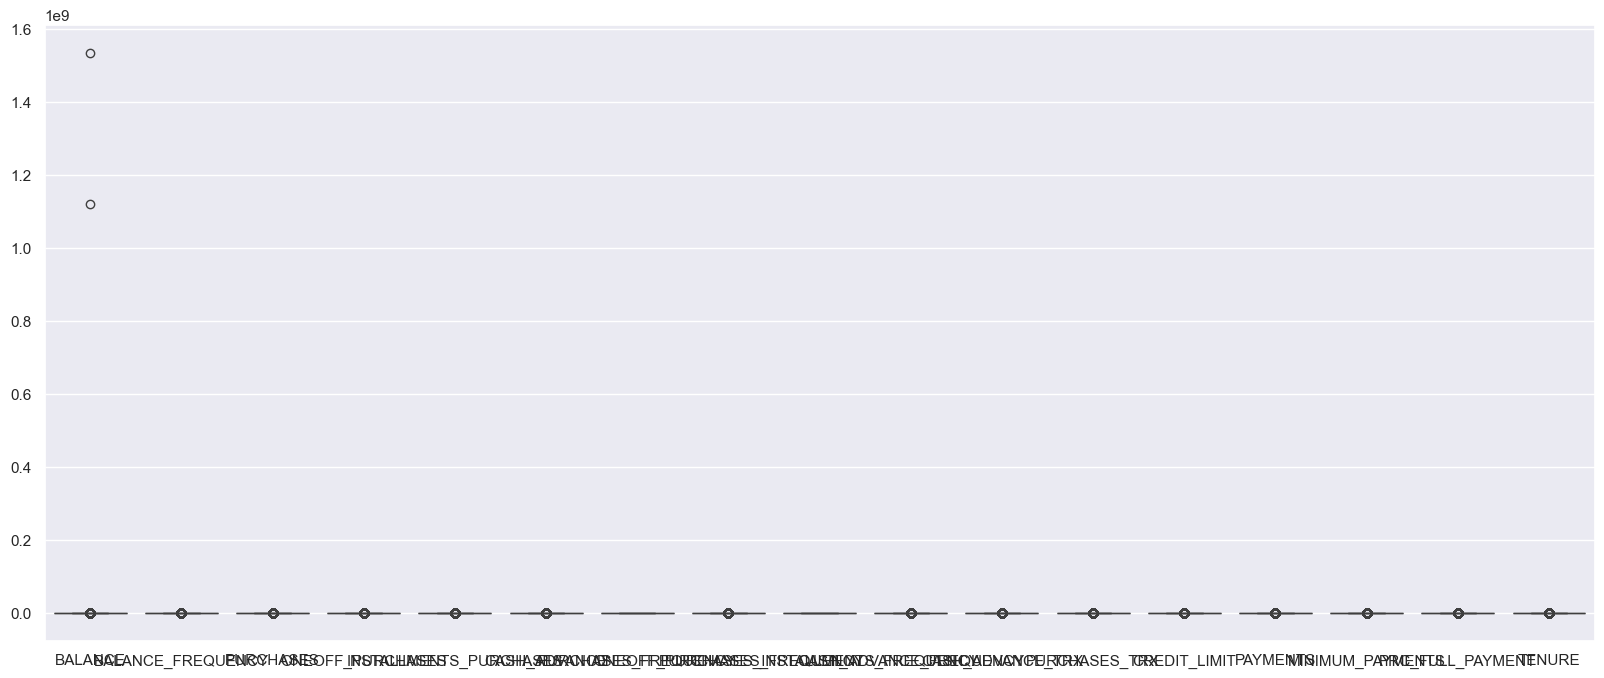

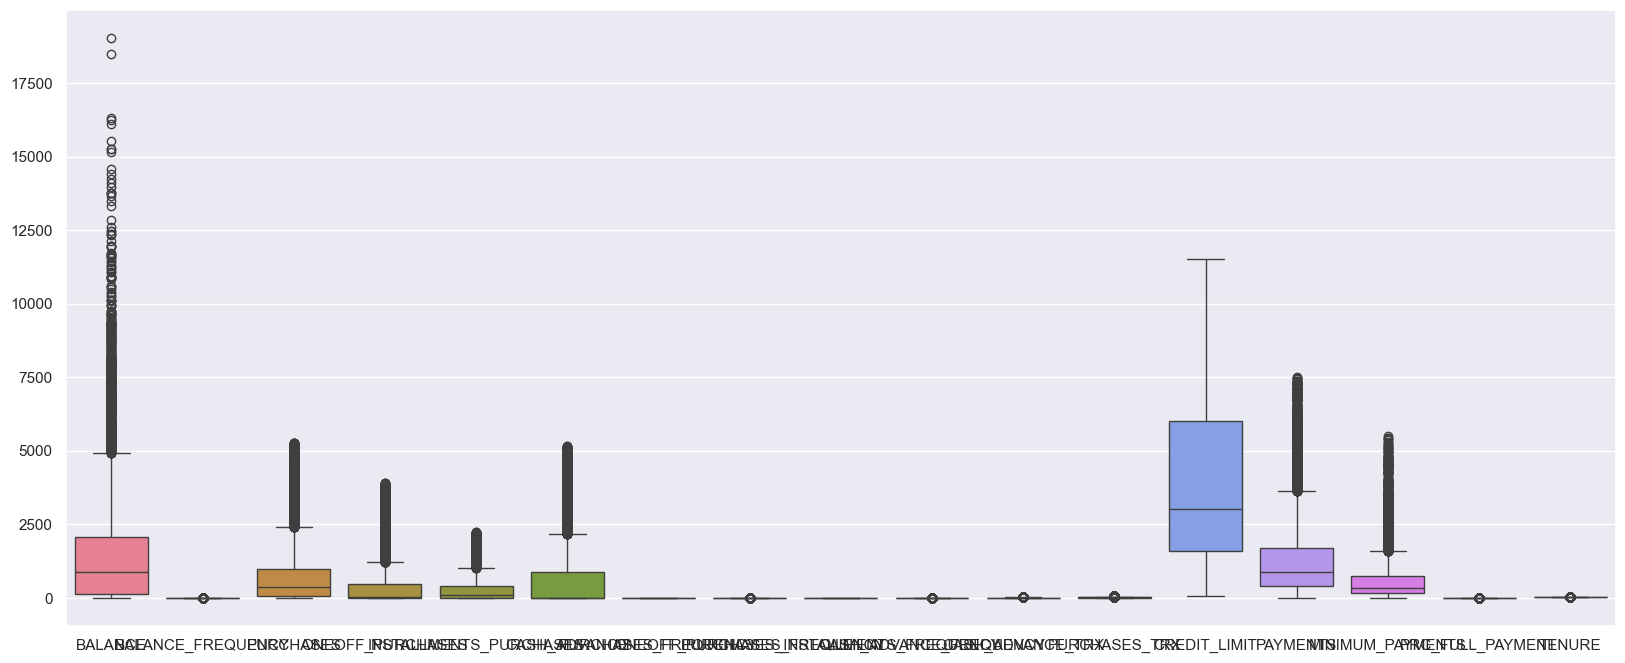

In [25]:
# Valores dentro de rangos adecuados: existen "outliers" (valores excesivamente grande en comparacion a la mayoria de los demas) en columnas como la de BALANCE que podrian alterar nuestro modelo.

# Antes: deteccion de outliers, se hara por medio de la eleccion de cualquier tupla que tenga como valor en balance mayor a n la desviacion estandar de la columna balance. En este caso n = 3.

# Reemplazaremos los valores no consistentes por la mediana de la columna

# Deteccion de outliers
cols_to_check = data.columns.drop('CUST_ID')
n = 2

# Antes de la limpieza
fig = plt.figure(figsize=(20, 8))
ax = sns.boxplot(data=data, orient="v")


for col in cols_to_check:
    mean = data[col].mean()
    std = data[col].std()
    
    # Replace outliers with the median value
    data.loc[data[col] > (mean + n * std), col] = data[col].median()
    data.loc[data[col] < (mean - n * std), col] = data[col].median()

# Despues de la limpieza
fig = plt.figure(figsize=(20, 8))
ax = sns.boxplot(data=data, orient="v")


**3.2 Unicidad**

Se verificara la unicidad para las siguientes columnas:

- CUST_ID
- El resto de columnas [que denominaremos "Columnas continuas"] (de manera individual sin involucar la comparacion junto a otras columnas) de datos excluyendo a las columnas categoricas y columnas con mediciones comunes (como credit limit).
- Nota: adicionalmente, se ignoraran duplicados de las demas columnas que sean de valores continuos donde el valor sea igual a 0.

Categoricas: No hay por las razones dichas inicialmente en el notebook.

De mediciones comunes: TENURE, CREDIT_LIMIT, PURCHASES_TRX, CASH_ADVANCE_TRX


In [26]:
# Verificacion de valores duplicados en la columna CUST_ID

print("Cantidad de valores duplicados en CUST_ID: ", data['CUST_ID'].duplicated().sum())

# Visualizacion de valores duplicados en la columna CUST_ID

data[data['CUST_ID'].duplicated()]

Cantidad de valores duplicados en CUST_ID:  11


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
72,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
335,C10298,2935.324966,1.000000,409.63,351.87,57.76,1876.241162,0.583333,0.583333,0.083333,0.250000,4,12,5000.0,580.138650,1114.588285,0.000000,12
947,C10298,2935.324966,1.000000,409.63,351.87,57.76,1876.241162,0.583333,0.583333,0.083333,0.250000,4,12,5000.0,580.138650,1114.588285,0.000000,12
1061,C10298,2935.324966,1.000000,409.63,351.87,57.76,1876.241162,0.583333,0.583333,0.083333,0.250000,4,12,5000.0,580.138650,1114.588285,0.000000,12
2235,C12297,1380.728565,1.000000,0.00,0.00,0.00,126.637116,0.000000,0.000000,0.000000,0.166667,3,0,1500.0,279.782836,515.444012,0.000000,12
3044,C13045,33.663794,1.000000,585.60,0.00,585.60,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,1000.0,578.786142,191.914428,0.000000,12
3181,C13263,140.120632,1.000000,644.16,0.00,644.16,0.000000,0.916667,0.000000,0.833333,0.000000,0,11,1500.0,399.905138,163.128265,0.000000,12
3562,C13654,1515.473846,1.000000,862.44,0.00,862.44,2402.323391,1.000000,0.000000,1.000000,0.083333,2,12,5000.0,5908.136491,412.289836,0.166667,12
3681,C13173,888.023397,0.909091,0.00,0.00,0.00,252.318137,0.000000,0.000000,0.000000,0.090909,3,0,1500.0,1734.981714,317.921967,0.181818,11
4179,C14250,22.151355,1.000000,134.87,64.98,69.89,0.000000,0.333333,0.166667,0.166667,0.000000,0,3,3000.0,41.580849,81.595815,0.000000,12


In [27]:
# Eliminacion de valores duplicados en la columna CUST_ID

data = data.drop_duplicates(subset='CUST_ID')

# Verificacion de valores duplicados en la columna CUST_ID

print("Cantidad de valores duplicados en CUST_ID: ", data['CUST_ID'].duplicated().sum())

Cantidad de valores duplicados en CUST_ID:  0


In [28]:
# Verificacion de valores duplicados en las "Columnas continuas"

# Columnas continuas = El resto de columnas (de manera individual sin involucar la comparacion junto a otras columnas) de datos excluyendo a las columnas categoricas y columnas con mediciones comunes (como credit limit).

# Categoricas: No hay por las razones dichas inicialmente en el notebook.

# De mediciones comunes: TENURE, CREDIT_LIMIT, PURCHASES_TRX, CASH_ADVANCE_TRX

all_cols = data.columns
cont_cols = [col for col in all_cols if col not in ['CUST_ID','TENURE', 'CREDIT_LIMIT', 'PURCHASES_TRX', 'CASH_ADVANCE_TRX']]
print("Columnas continuas: ", cont_cols)

# Verificacion de valores duplicados en las "Columnas continuas"

print("\nCantidad de valores duplicados en las columnas continuas: ", data[cont_cols].duplicated().sum())

Columnas continuas:  ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']

Cantidad de valores duplicados en las columnas continuas:  0


No se encuentran duplicados en nuestras columnas continuas, por lo cual no se haria nada respecto a estas en lo relacionado a unicidad.

In [29]:
# Verificacion de valores duplicados en todas las columnas

print("\nCantidad de valores duplicados en todas las columnas: ", data.duplicated().sum())


Cantidad de valores duplicados en todas las columnas:  0


3.1 Completitud - Análisis de valores nulos o vacíos

In [30]:
# Porcentaje de valores nulos por columna
((data.isnull().sum() / data.shape[0]) * 100).sort_values(ascending=False) # from 100% to 0%


CUST_ID                             0.0
BALANCE                             0.0
PRC_FULL_PAYMENT                    0.0
MINIMUM_PAYMENTS                    0.0
PAYMENTS                            0.0
CREDIT_LIMIT                        0.0
PURCHASES_TRX                       0.0
CASH_ADVANCE_TRX                    0.0
CASH_ADVANCE_FREQUENCY              0.0
PURCHASES_INSTALLMENTS_FREQUENCY    0.0
ONEOFF_PURCHASES_FREQUENCY          0.0
PURCHASES_FREQUENCY                 0.0
CASH_ADVANCE                        0.0
INSTALLMENTS_PURCHASES              0.0
ONEOFF_PURCHASES                    0.0
PURCHASES                           0.0
BALANCE_FREQUENCY                   0.0
TENURE                              0.0
dtype: float64

Se identifican como candidatas a tratar los nulos de las columnas MINIMUM_PAYMENTS, ONEOFF_PURCHASES_FREQUENCY, CASH_ADVANCE & CREDIT_LIMIT. Para las cuales se pueden tomar decisiones diferentes.

MINIMUM_PAYMENTS: revisando los datos nos damos cuenta de que cada vez que minium_payments es nulo es por dos razones posibles: (1) el valor para la misma fila en payments es igual a cero, o (2) ese valor es diferente a cero.

- Para el primer caso donde payments = 0 & minimum payments = null se puede asumir que la deuda esta paga, por lo que la persona debe 0 tambien, asi que minimum payments puede ser 0 en este caso
- Para el segundo caso donde payments != 0 & minimum payments = null se puede asumir que esa podria ser la ultima "cuota" de la persona y que por lo tanto el valor minimo a pagar seria ese al no estar definido. Tambien se podria asumir que este sea 0 aunque esto implicaria que no se represente adecuadamente la realidad, por eso se decide hacer la primera opcion que es igualar payments con minimum payments en estos casos.

Finalmente, eso se reduce a que minimum payments sea igual a payments cuando minimum payments es nulo.

ONEOFF_PURCHASES_FREQUENCY: tiene valores nulos y ocurren en casos donde otras columnas que podrian estar relacionadas a esta tienen valores iguales o diferentes a 0, por lo que no se sigue un patron que permita indicar que los valores nulos indiquen que el usuario no haya hecho oneoff pucharses. Es por esto que se considera usar una estadistica para reemplazar su valor ya que este tambien suele tener un comportamiento similar en la psicologia humana al vivir bajos condiciones similares de sistemas economicos globalmente. Por lo que nos queda la opcion de elegir la mediana o promedio de datos en esta columna. Para ello se decidira que tan bien distribuidos estan los datos, si hay valores muy extremos o si suelen ser centrales. Debido a la naturaleza de su concepto al ser una frecuencia sus valores deberian estan dentro del rango de 0 a 1, por lo que consideramos usar cualquiera de las dos, en este caso la mediana para evitar sesgos por datos muy diferenciales (valores de 0 y 1 que sesguen el promedio).




In [31]:
# Desviacion estandar de cash advance
print("Desviacion estandar de cash advance: ", data['CASH_ADVANCE'].std())

# Media de cash advance
print("Media de cash advance: ", data['CASH_ADVANCE'].mean())

# Desviacion > media?
print("Desviacion > media: ", data['CASH_ADVANCE'].std() > data['CASH_ADVANCE'].mean())


Desviacion estandar de cash advance:  1102.7309449840277
Media de cash advance:  624.22943569419
Desviacion > media:  True


CASH_ADVANCE: La desviacion es mayor que la media, por lo que los datos estan muy dispersos, por lo que se usara la mediana para reemplazar los valores nulos y evitar sesgos de la desviacion alta.

In [32]:
# Desviacion estandar de limite de credito
print("Desviacion estandar de limite de credito: ", data['CREDIT_LIMIT'].std())

# Media de limite de credito
print("Media de limite de credito: ", data['CREDIT_LIMIT'].mean())

# Desviacion > media?
print("Desviacion > media: ", data['CREDIT_LIMIT'].std() > data['CREDIT_LIMIT'].mean())

Desviacion estandar de limite de credito:  2689.241474011968
Media de limite de credito:  3889.5059364595527
Desviacion > media:  False


CREDIT_LIMIT: Se usara el promedio para reemplazar los valores debido a que estos no son muy dispersos y no hay valores en una cola vertical en otro extremo muy grandes que puedan sesgar este valor.

3.1.1 Limpieza de datos nulos para completitud

MINIMUM_PAYMENTS

In [33]:
# Antes de limpiar MINIMUM_PAYMENTS

# Cantidad de valores nulos
print("Cantidad de valores nulos: ", data['MINIMUM_PAYMENTS'].isnull().sum(), " of ", data.shape[0], " (", (data['MINIMUM_PAYMENTS'].isnull().sum() / data.shape[0]) * 100, "%)")

Cantidad de valores nulos:  0  of  8950  ( 0.0 %)


In [34]:
# Limpieza de nulos para minimum_payments: minimum_payments = payments

data['MINIMUM_PAYMENTS'].fillna(data['PAYMENTS'], inplace=True)

# Cantidad de valores nulos
print("Cantidad de valores nulos: ", data['MINIMUM_PAYMENTS'].isnull().sum(), " of ", data.shape[0], " (", (data['MINIMUM_PAYMENTS'].isnull().sum() / data.shape[0]) * 100, "%)")


Cantidad de valores nulos:  0  of  8950  ( 0.0 %)


C:\Users\Andre\AppData\Local\Temp\ipykernel_13684\266434974.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['MINIMUM_PAYMENTS'].fillna(data['PAYMENTS'], inplace=True)


ONEOFF_PURCHASES_FREQUENCY

In [35]:
# Antes de limpiar ONEOFF_PURCHASES_FREQUENCY

# Cantidad de valores nulos
print("Cantidad de valores nulos: ", data['ONEOFF_PURCHASES_FREQUENCY'].isnull().sum(), " of ", data.shape[0], " (", (data['ONEOFF_PURCHASES_FREQUENCY'].isnull().sum() / data.shape[0]) * 100, "%)")

Cantidad de valores nulos:  0  of  8950  ( 0.0 %)


In [36]:
# Limpieza de nulos para ONEOFF_PURCHASES_FREQUENCY: ONEOFF_PURCHASES_FREQUENCY = mediana

data['ONEOFF_PURCHASES_FREQUENCY'].fillna(data['ONEOFF_PURCHASES_FREQUENCY'].median(), inplace=True)

# Cantidad de valores nulos
print("Cantidad de valores nulos: ", data['ONEOFF_PURCHASES_FREQUENCY'].isnull().sum(), " of ", data.shape[0], " (", (data['ONEOFF_PURCHASES_FREQUENCY'].isnull().sum() / data.shape[0]) * 100, "%)")

Cantidad de valores nulos:  0  of  8950  ( 0.0 %)


C:\Users\Andre\AppData\Local\Temp\ipykernel_13684\4178839451.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['ONEOFF_PURCHASES_FREQUENCY'].fillna(data['ONEOFF_PURCHASES_FREQUENCY'].median(), inplace=True)


CASH_ADVANCE

In [37]:
# Antes de limpiar CASH_ADVANCE

# Cantidad de valores nulos
print("Cantidad de valores nulos: ", data['CASH_ADVANCE'].isnull().sum(), " of ", data.shape[0], " (", (data['CASH_ADVANCE'].isnull().sum() / data.shape[0]) * 100, "%)")

Cantidad de valores nulos:  0  of  8950  ( 0.0 %)


In [38]:
# Limpieza de nulos para CASH_ADVANCE: CASH_ADVANCE = mediana

data['CASH_ADVANCE'].fillna(data['CASH_ADVANCE'].median(), inplace=True)

# Cantidad de valores nulos
print("Cantidad de valores nulos: ", data['CASH_ADVANCE'].isnull().sum(), " of ", data.shape[0], " (", (data['CASH_ADVANCE'].isnull().sum() / data.shape[0]) * 100, "%)")

Cantidad de valores nulos:  0  of  8950  ( 0.0 %)


C:\Users\Andre\AppData\Local\Temp\ipykernel_13684\4113825716.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['CASH_ADVANCE'].fillna(data['CASH_ADVANCE'].median(), inplace=True)


CREDIT_LIMIT

In [39]:
# Antes de limpiar CREDIT_LIMIT

# Cantidad de valores nulos
print("Cantidad de valores nulos: ", data['CREDIT_LIMIT'].isnull().sum(), " of ", data.shape[0], " (", (data['CREDIT_LIMIT'].isnull().sum() / data.shape[0]) * 100, "%)")

Cantidad de valores nulos:  0  of  8950  ( 0.0 %)


In [40]:
# Limpieza de nulos para CREDIT_LIMIT: CREDIT_LIMIT = mediana

data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].median(), inplace=True)

# Cantidad de valores nulos
print("Cantidad de valores nulos: ", data['CREDIT_LIMIT'].isnull().sum(), " of ", data.shape[0], " (", (data['CREDIT_LIMIT'].isnull().sum() / data.shape[0]) * 100, "%)")

Cantidad de valores nulos:  0  of  8950  ( 0.0 %)


C:\Users\Andre\AppData\Local\Temp\ipykernel_13684\1006899290.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].median(), inplace=True)


### 3.4 Validez

La validez de los datos se refiere a qué tan bien los datos representan la realidad que se estan tratando de modelar.

En nuestro caso consideramos que cada una de las verificaciones que hicimos en los pasos de preparacion de datos anteriormente no permiten argumentar que los datos son validos, ya que ademas de prepararlos hemos verificado despues de la correccion que efectivamente sean adecuados, y nosotros ya validamos esto viendo cada resultado de cada verificacion.

Lo dicho se puede ver reflejado mejor en el apartado de consistencia, donde verificamos varias consistencias que consideramos deben ocurrir en la vida real, como por ejemplo, que una persona no tenga una frecuencia de compra negativa, ya que en la vida real no tiene sentido, y asi con los demas casos.

Para verificar los datos una vez mas haremos un diagrama de caja para visualizar si existen todavia la presencia de outliers, ya que esta fue una condicion que no tratamos en las validaciones anteriores:

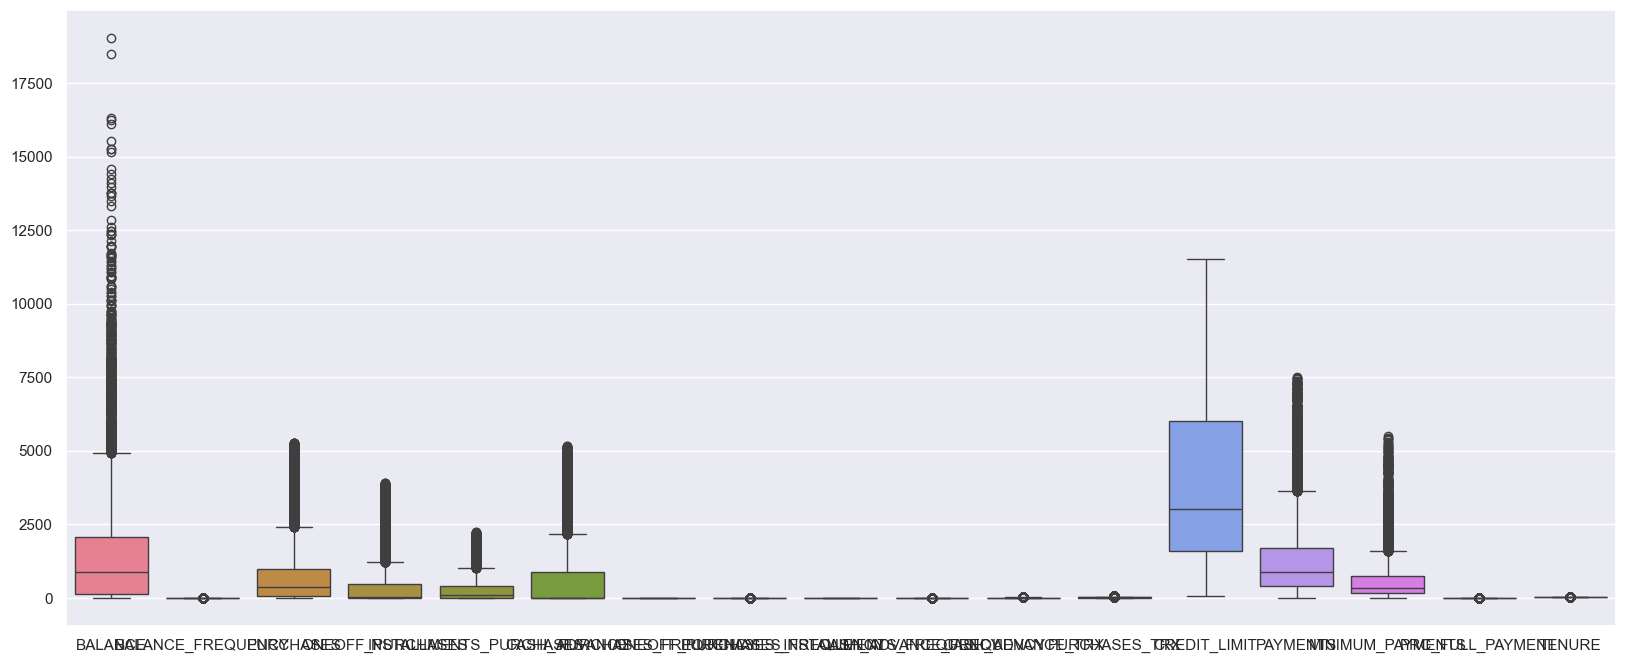

In [41]:
fig = plt.figure(figsize=(20, 8))
ax = sns.boxplot(data=data, orient="v")

Como se puede observar, debido a la escala se identifica que no existen muchos outliers y que los que se encuentrean fuera de la vela indica que esa es la naturaleza de los datos. Asi que se considera que se ha hecho una limpieza de datos adecuada.

In [42]:
# Save data to excel file

data.to_excel("../data/data_cleaned.xlsx", index=False)

### 4. Modelamiento

En este paso se lleva a cabo la elección del modelo con el que queremos cumplir nuestra tarea y su refinamiento.
En este caso, deben usar el algoritmo de K-Means y deberán compararlo con otros dos algoritmos como clustering jerárquico, DBScan, HDBScan, clustering espectral.
Tengan en cuenta que, en ambientes profesionales, la elección y justificación del algoritmo y sus hiperparámetros hace parte de su tarea de consultoría.
Se sugiere explorar la generación de clústeres que puedan llevar a mejores valores de coeficiente de silueta, al igual que a mejor comprensión de los grupos por parte de la organización.

#### 4.1 Algoritmo de Ronald Pardo (202111309) - Clustering jerarquico

Se escogio este algoritmo debido a que clustering jerarquico (aglomerativo) es conocido junto a K-means por ser excelente para la interpretacion y visualizacion, y como este proyecto sera presentado a los directivos y jefes de marketing de la compañia podremos tomar una ventaja de el. Adcionalmente, las otras razones por las cuales se ha decidido escoger este algoritmo son las siguientes:

- (Aglomerativo) Tiene un enfoque Bottom Up, es decir, para crear los clusteres se inicializan todas las observaciones como su propio cluster, que luego empieza a "fusionarse" con otros clusteres hasta llegar a niveles mas alto en la jerarquia.

- No se debe de indicar el numero de clusteres a priori: esto es bueno en este caso debido a que contamos con data que tiene ruido outliers y multiples dimensiones de datos que pueden hacer que los datos se vuelvan equidistanciados unos a otros, sumado a la dificultad que impone tener mucho ruido en los datos que provocan que la estructura de los datos por detras no sea la adecuada y se formen clusters artificiales, lo cual se quiere evitar para tener una vision acertada de los segmentos de clientes.

- Proucen clusteres que pueden ser visualizados y entendidos facilmente, lo cual es importante para la comunicacion de los resultados.

No obstante, se sabe que existen desventajas de usar este algoritmo la cuales son las siguientes:

- Debido a su gran complejidad computacional puede no ser la mejor opcion para datos grandes.

- Puede tener sesgos con outliers debido a que una vez un cluster fue creado, su creacion no se puede deshacer y se acomulara en los niveles superiores de la jerarquia.

Por lo que se considero la presencia de outliers y la limpieza de datos realizada y hemos optado por tomar este algoritmo debido a que la presencia de outliers es minima y fueron removidos, tambien porque consideramos que es un proyecto importante para la compañia que le permitiria conseguir segmentaciones de mercado que puedan ser mas eficientes que las actuales sobre clientes actuales, aunque se considera que el caso de escalamiento de datos donde cada tupla es una persona pueda no ser impactante debido a que existe un limite actual y la tendencia mundial de crecimiento de poblacion ha sido pronosticada a reducirse en el año 2050.



**Paso a paso**

4.1.0 nueva libreria

In [43]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

4.1.1 Computar la distancia desde cada pareja de puntos de datos, para almacenarlo luego en una matrix de linkage.

Para esto se usara el metodo "ward" ya que permitie minimizar la varianza total dentro del cluster, lo cual conlleva a exista un incremento minimo en la variaza total dentro del cluster despues de la fusion de dos clusters (merging).

Esto es bueno porque los datos actuales tienden a tener desviaciones mas altas de lo usual y a estar dispersos como lo muestran los boxplots.

4.1.2 Seleccionar columas

Se seleccionaran las siguientes columnas: 

- Pucharses: nos permite conocer cuanto dinero bruto suele gastar la persona
- Balance: Dinero disponible para gastar de la persona en promedio mensualmente
- Pucharse frequency: Que tanto compra la persona
- Credit limit: que tipo de personas suelen romper su limite de credito y que caracteristicas comparten

In [44]:
data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

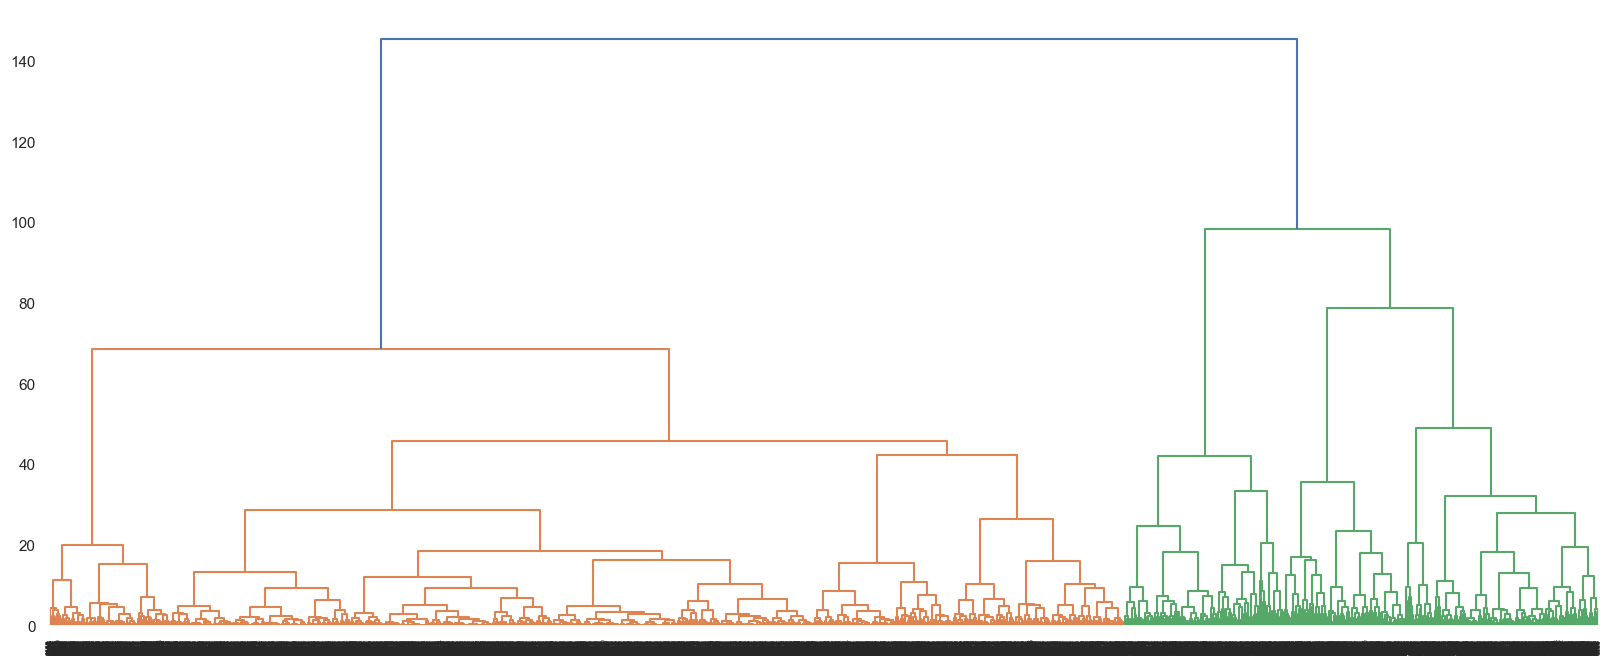

In [45]:
scaler = StandardScaler()

target_cols = ["CREDIT_LIMIT","PURCHASES","BALANCE","PAYMENTS"]

data_scaled = scaler.fit_transform(data[target_cols])

linked = linkage(data_scaled, 'ward')

fig = plt.figure(figsize=(20, 8))
dendrogram(linked, orientation='top', distance_sort=True, show_leaf_counts=True)
plt.show()


La grafica superior corresponde a un dendograma de jerarquia en los clusters. Cada hoja o linea vertical ubicada a la izquierda o derecha representa un punto de dato, y el nodo padre, es decir, el nodo donde se fusionan ambas hojas corresponde a la combinacion de esos dos clusters hijos. Adicionalmente, la altura a la que se encuentre ubicacado el nodo indica que tan diferente son los clusters de lo cuales se resulta su fusion.

Esto nos sirve para hallar el numero de clusters a utilizar, para ello hallaremos el punto codo el cual corresponde en este caso al nodo donde ocurre el salto mas grande en comparacion al de sus hijos, en este dendograma esto ocurre en el valor aprox de 60. En este mismo valor de y = 97 hacemos una linea horizontal y el numero de lineas horizontales que intersecten esta linea horizontal sera el numero de clusters a usar. En este caso ese valor es 5.

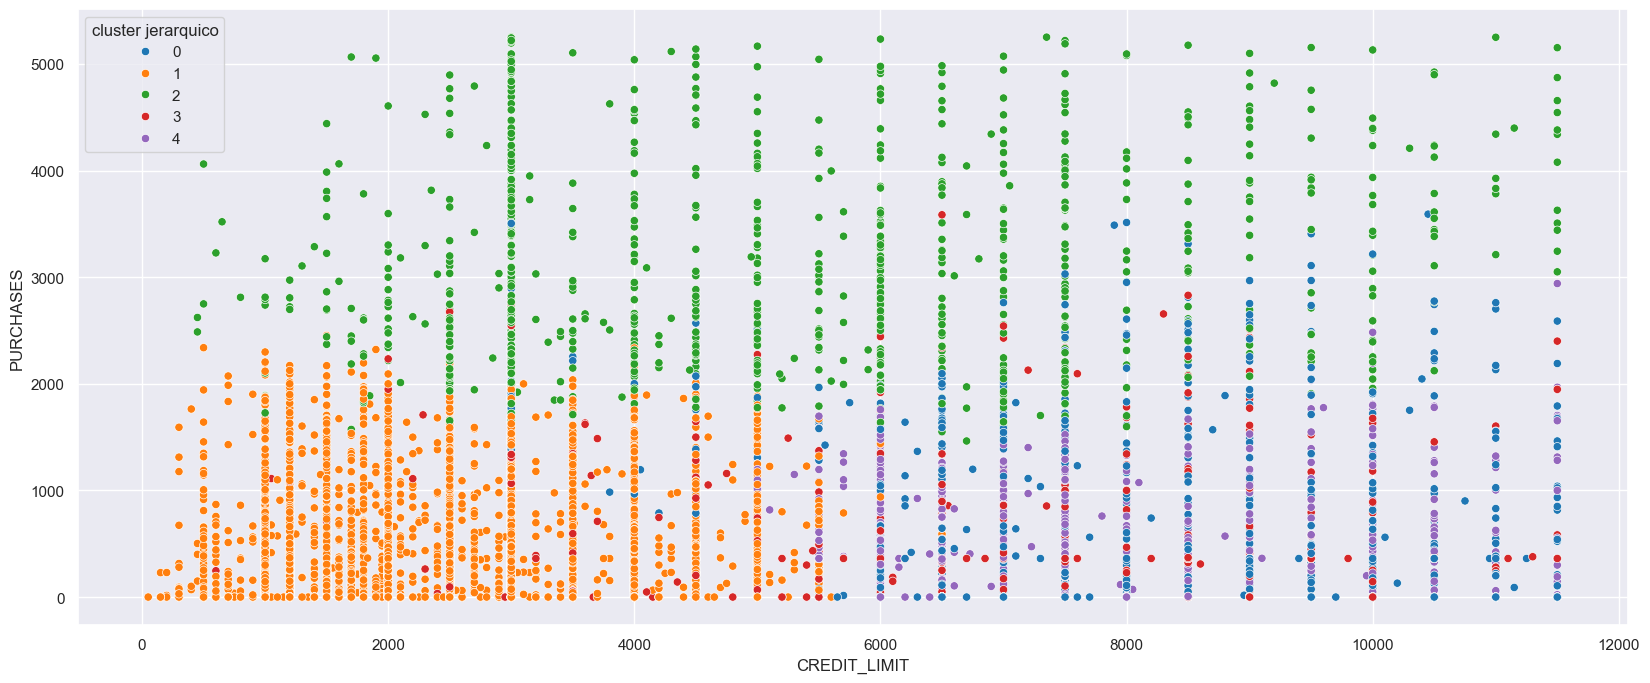

In [46]:
# Application of agglomerative clustering
n = 5

cluster = AgglomerativeClustering(n_clusters=n, linkage='ward')
data['cluster jerarquico'] = cluster.fit_predict(data_scaled)

# Plotting the clusters
fig = plt.figure(figsize=(20, 8))
ax = sns.scatterplot(data=data, x='CREDIT_LIMIT', y='PURCHASES', hue='cluster jerarquico', palette='tab10')

In [47]:
from sklearn.metrics import silhouette_score
score = silhouette_score(data_scaled, cluster.labels_)
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.350


Finalmente se pued eobservar que con las columnas escogidas se obtiene un valor de silueta de 0.350, el cual oscila entre -1 y 1, siendo mayor 0 mejor y mejor agrupado. Por lo que con nuestro valor de silueta de 0.35 podemos argumentar que tenemos un modelo bueno para segmentar a los clientes de acuerdo a la cantidad de compras y su limite crediticio en cuatro grupos diferentes:

Naranja: Bajo pucharses y bajo limite crediticio
Verde: Alto pucharse y limite crediticio que varia desde 2000 aproximadamente hasta 11000
Morado y azul: son dos grupos cercanos que suelen tener altos limites crediticios pero un nivel de pucharses mediano o medio alto.

Finalmente, en un contexto cotidiano se podria decir que puede ser similar a una clasificacion de niveles de gastos de la persona de acuerdo a su estrato socioeconomico, donde aquellos se refleja posiblemente a la clase baja, media y alta de manera no rigurosa.

#### 4.2 Algoritmo de Nicolas Riveros (): DBSSCAN



In [48]:
# Verificar valores nulos
print("Valores nulos:")
print(data[['PURCHASES', 'PURCHASES_FREQUENCY', 'CREDIT_LIMIT', 'BALANCE']].isnull().sum())

# Verificar y eliminar duplicados
print("\nCantidad de valores duplicados:", data['CUST_ID'].duplicated().sum())

# Verificar duplicados en las "Columnas continuas"
all_cols = data.columns
cont_cols = [col for col in all_cols if col not in ['CUST_ID', 'TENURE', 'CREDIT_LIMIT', 'PURCHASES_TRX', 'CASH_ADVANCE_TRX']]
print("\nCantidad de valores duplicados en las columnas continuas:", data[cont_cols].duplicated().sum())


Valores nulos:
PURCHASES              0
PURCHASES_FREQUENCY    0
CREDIT_LIMIT           0
BALANCE                0
dtype: int64

Cantidad de valores duplicados: 0

Cantidad de valores duplicados en las columnas continuas: 0


In [49]:
# Selecciona las variables relevantes
selected_cols = ['PURCHASES', 'PURCHASES_FREQUENCY', 'CREDIT_LIMIT', 'BALANCE']

# Crea un nuevo DataFrame solo con las columnas seleccionadas
df_selected = data[selected_cols]

Al analizar estas cuatro variables, podríamos observar patrones en el comportamiento de compra de los clientes. Podríamos identificar clientes frecuentes con compras de alto volumen y clientes menos activos con compras más sencillas. Podríamos analizar cómo el límite de crédito asignado se relaciona con la cantidad y frecuencia de las compras.Y podríamos analizar si existe alguna correlación entre el saldo en la cuenta de un cliente y su patrón de compras.

In [50]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import pandas as pd

df_selected_copy = df_selected.copy()

# Reemplaza los valores no numéricos con NaN
df_selected_copy['CREDIT_LIMIT'] = pd.to_numeric(df_selected_copy['CREDIT_LIMIT'], errors='coerce', downcast='float')

# Llena los valores nulos con la media
df_selected_copy['CREDIT_LIMIT'].fillna(df_selected_copy['CREDIT_LIMIT'].mean(), inplace=True)

# Normalizar los datos
df_selected_copy = df_selected_copy.apply(pd.to_numeric, errors='coerce')
scaler = StandardScaler()
df_selected_scaled = scaler.fit_transform(df_selected_copy)

# Valores faltantes con la media
imputer = SimpleImputer(strategy='mean')
df_selected_imputed = pd.DataFrame(imputer.fit_transform(df_selected_scaled), columns=df_selected_copy.columns)

# Aplica DBScan
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(df_selected_imputed)

# Agrega los resultados al DataFrame original
data['Cluster_DBScan'] = clusters

C:\Users\Andre\AppData\Local\Temp\ipykernel_13684\1021938249.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_selected_copy['CREDIT_LIMIT'].fillna(df_selected_copy['CREDIT_LIMIT'].mean(), inplace=True)


Algoritmo de Agrupamiento DBScan: El algoritmo tiene la capacidad de identificar datos atípicos y agrupar los datos restantes en clusters, lo cual es importante. Permite identificar clusters de forma arbitraria y no requiere que especifiquemos el número de clusters.

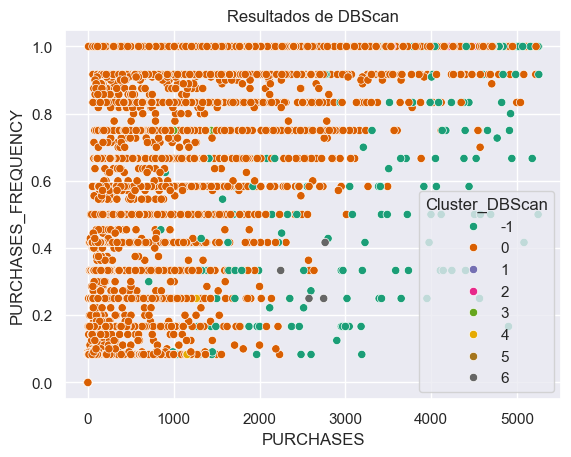

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='PURCHASES', y='PURCHASES_FREQUENCY', hue='Cluster_DBScan', data=data, palette='Dark2')
plt.title('Resultados de DBScan')
plt.show()

C:\Users\Andre\AppData\Local\Temp\ipykernel_13684\1673150134.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_distrib.index, y=cluster_distrib.values, palette='viridis')


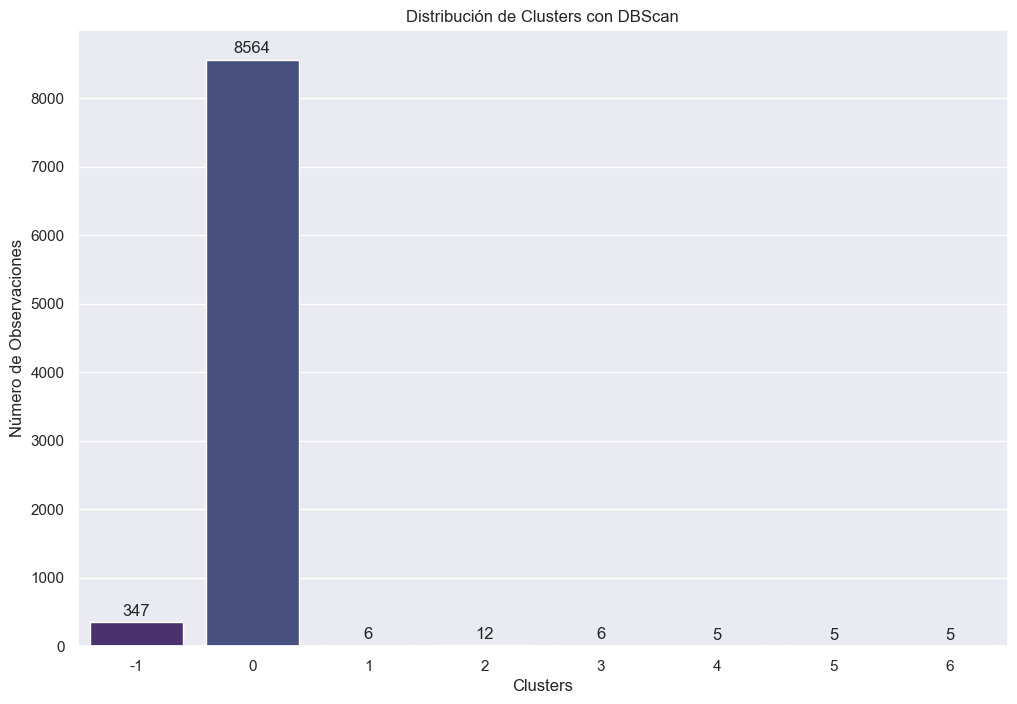

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualización de la distribución de los clusters
fig, ax = plt.subplots(figsize=(12, 8))

# Ordenar los clusters
cluster_distrib = data['Cluster_DBScan'].value_counts().sort_index()

# Utilizar la paleta predeterminada y agregar etiquetas
sns.barplot(x=cluster_distrib.index, y=cluster_distrib.values, palette='viridis')

# Etiquetar las barras
for i, val in enumerate(cluster_distrib.values):
    ax.text(i, val + 50, str(val), ha='center', va='bottom')

plt.title('Distribución de Clusters con DBScan')
plt.xlabel('Clusters')
plt.ylabel('Número de Observaciones')
plt.show()

Distribución de Clusters: La visualización de la distribución de clusters proporciona una comprensión rápida de la cantidad de datos en cada cluster, ayudando a identificar clusters dominantes y aquellos que pueden ser minoritarios.

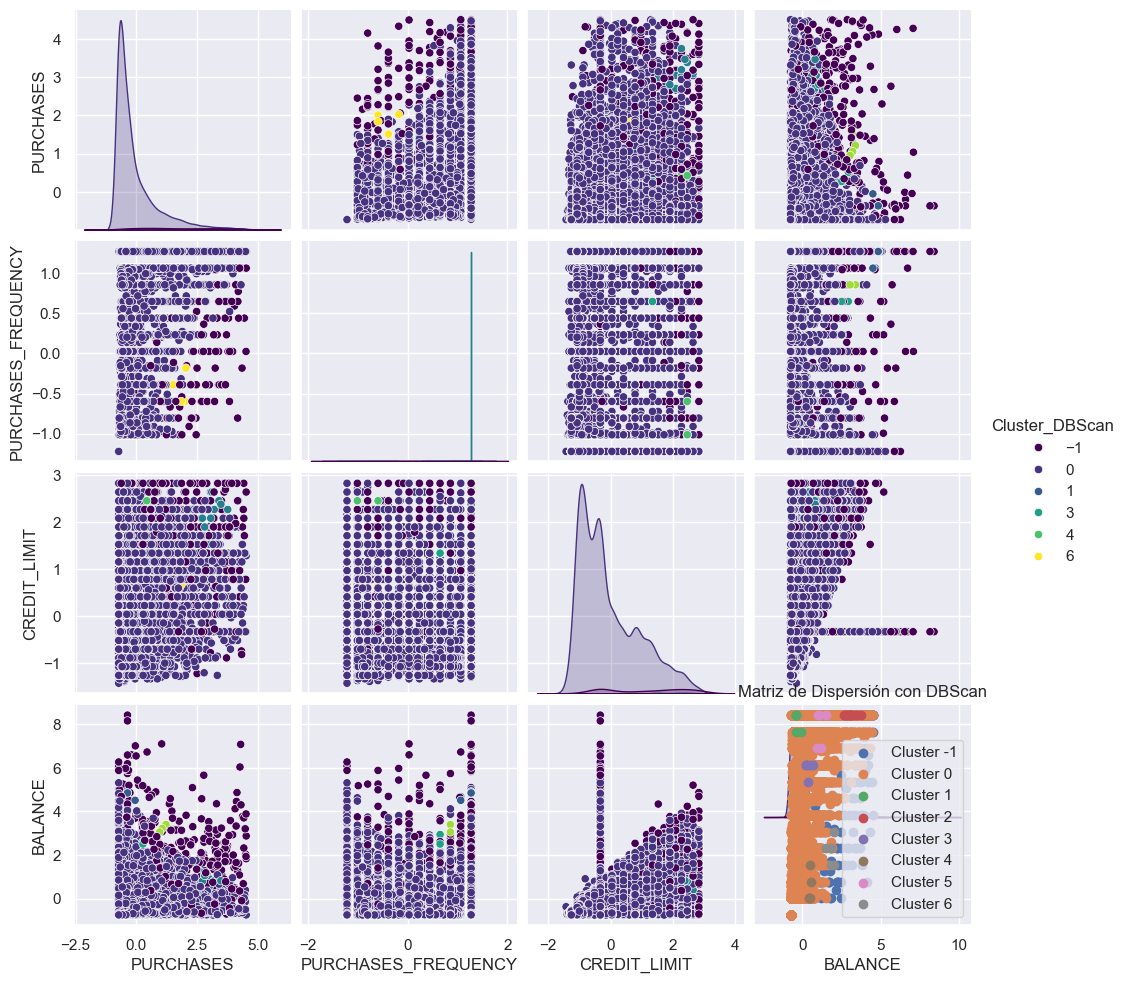

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualización en una matriz de dispersión

df_selected_imputed['Cluster_DBScan'] = clusters

sns.pairplot(data=df_selected_imputed, hue="Cluster_DBScan", palette='viridis')

# Ver en una gráfica de dispersión los clusters generados
for i, cluster_id in enumerate(np.unique(clusters)):
    plt.scatter(df_selected_imputed[clusters == cluster_id]['PURCHASES'], df_selected_imputed[clusters == cluster_id]['PURCHASES_FREQUENCY'], label=f'Cluster {cluster_id}')

plt.title('Matriz de Dispersión con DBScan')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.legend()
plt.show()


Matriz de Dispersión: La matriz de dispersión permite visualizar las relaciones entre pares de variables en función de los clusters. Puede ayudar a identificar patrones específicos o tendencias en los datos de diferentes clusters. Se pueden empezar a observar patrones como que a medida que aumenta el límite de crédito, las compras también tienden a ser mayores, o que el balance no establece mucha informacion para destacar al analizarlo en relacion con otras variables.

In [62]:
from sklearn.metrics import silhouette_samples, silhouette_score
import seaborn as sns

# Calcular el coeficiente de silueta
silhouette_avg = silhouette_score(df_selected_imputed, clusters)
print(f'Coeficiente de silueta promedio: {silhouette_avg:.3f}')

# Calcular el coeficiente de silueta para cada muestra
sample_silhouette_values = silhouette_samples(df_selected_imputed, clusters)

print("Valores de silueta para cada muestra:")
print(sample_silhouette_values)

Coeficiente de silueta promedio: 0.420
Valores de silueta para cada muestra:
[0.60405842 0.37826372 0.29789805 ... 0.57427521 0.57224496 0.56188168]


El coeficiente de silueta promedio es un indicador clave para evaluar la calidad de la agrupación. Valores más cercanos a 1 indican una buena separación entre los clusters, mientras que valores negativos sugieren superpisicion de los datos, en este caso se puede observar que la agrupacion de los clusters no es la esperada, pero tampoco muestra una mala separacion de datos.

### 4.3 Algoritmo de Andres Guerrero: k-means

4.1 Preparar los datos

Columnas seleccionadas para el análisis :

PURCHASES (numérica): Monto total de compra gastado durante los últimos 12 meses

PAYMENTS (numérica):

BALANCE (numérica):

CREDIT_LIMIT (numérica): Límite de crédito

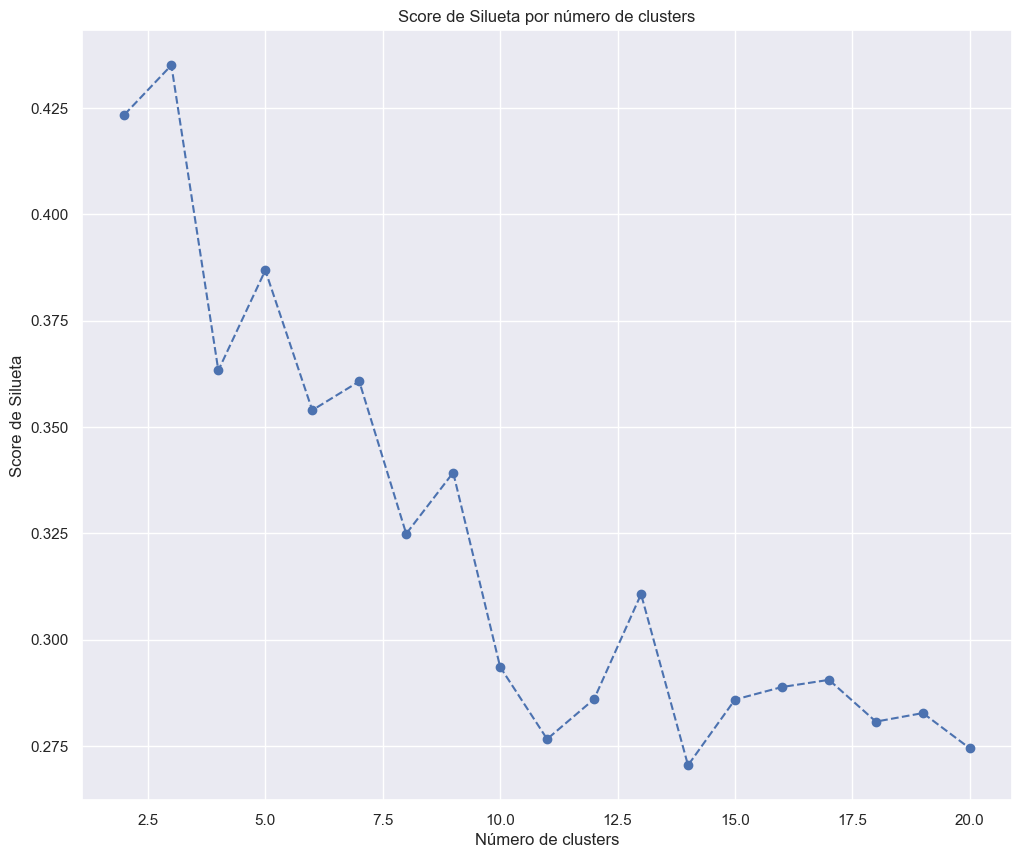

In [55]:
# Selecciona las columnas relevantes para el análisis.

target_cols = ["PURCHASES",'CREDIT_LIMIT',"PAYMENTS", "BALANCE" ]

# Se escala el conjunto de datos para que todas las variables tengan el mismo peso en el algoritmo de KMeans.
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[target_cols])
# Para cada número de clusters en el rango definido, se ejecuta KMeans y se calcula el score de silueta.
range_clusters = range(2, 21)  # Extendido hasta 20
silhouette_scores = []

for n_clusters in range_clusters:
    # Inicializa y ajusta KMeans.
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(data_scaled)

    # Calcula el score de silueta para el número actual de clusters.
    silhouette_avg = silhouette_score(data_scaled, kmeans_labels)
    silhouette_scores.append(silhouette_avg)

# Graficar el score de silueta
plt.figure(figsize=(12,10))
plt.plot(range_clusters, silhouette_scores, marker='o', linestyle='--')
plt.title('Score de Silueta por número de clusters')
plt.xlabel('Número de clusters')
plt.ylabel('Score de Silueta')
plt.show()

### *Análisis del Score de Silueta para la Determinación del Número Óptimo de Clusters*


Análisis del Score de Silueta para la Determinación del Número Óptimo de Clusters

El score de silueta mide qué tan cerca están los puntos de datos de otros puntos en el mismo cluster en comparación con otros clusters. Valores más cercanos a 1 indican una asignación adecuada de los datos, mientras que valores cercanos a -1 sugieren que los datos han sido asignados al cluster incorrecto.

Para nuestro conjunto de datos, comenzamos evaluando el score de silueta con 3 clusters, obteniendo un valor de aproximadamente 0.55. Incrementando el número de clusters, observamos una disminucion en el score, alcanzando cerca de 0.4con 10 clusters.

al aumentar aún más el número de clusters más allá de 10, aunque el score de silueta empeora .Cabe resaltar que el modelo tiene más "flexibilidad" para agrupar los datos, lo que puede llevar a un sobreajuste. Es decir, aunque podríamos obtener una asignación casi perfecta con un número de clusters igual al número de observaciones, esto no sería útil ni interpretable.

In [56]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

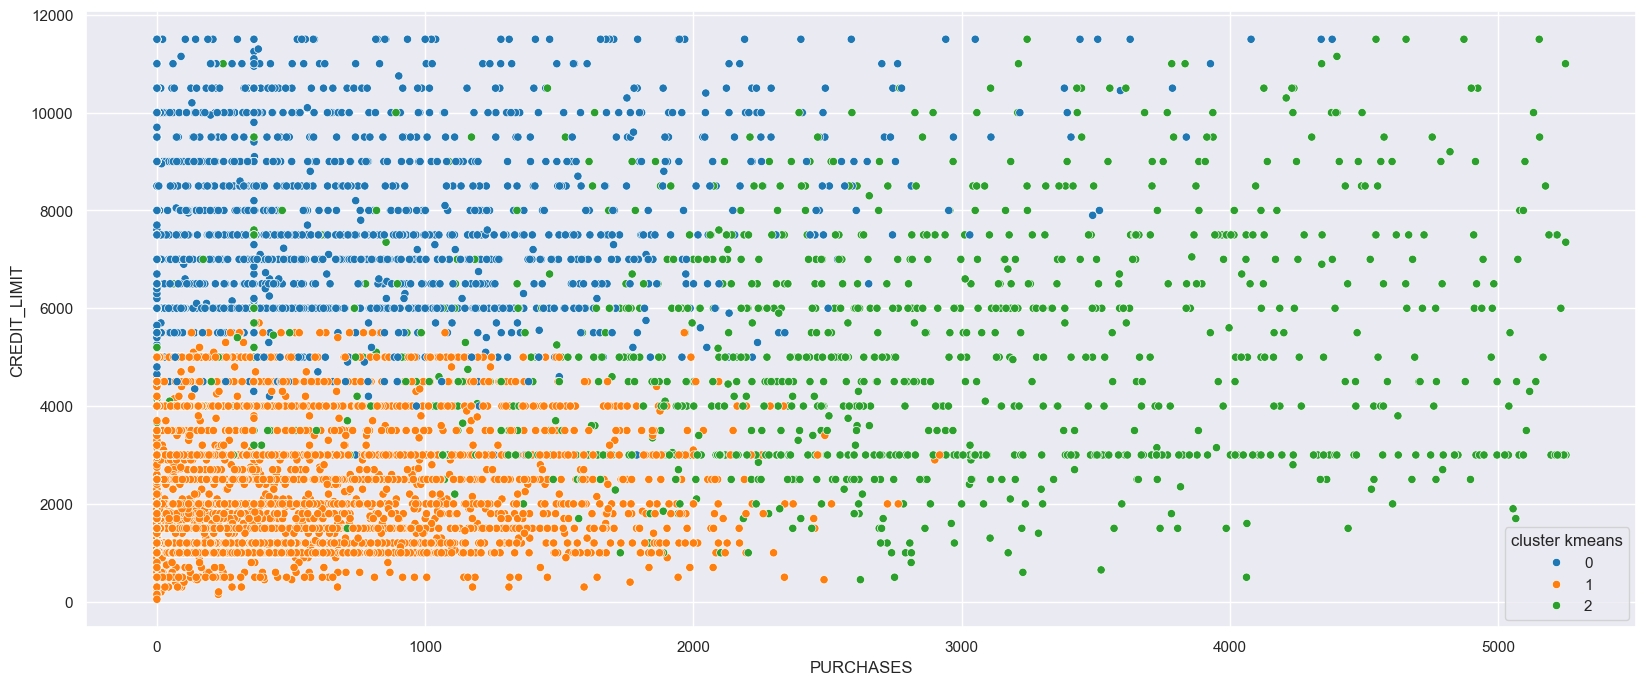

In [58]:
target_cols = ["PURCHASES",'CREDIT_LIMIT',"PAYMENTS","CREDIT_LIMIT", "BALANCE" ]

# Se escala el conjunto de datos para que todas las variables tengan el mismo peso en el algoritmo de KMeans.
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[target_cols])


# Application of kmeans
n = 3

kmeans = KMeans(n_clusters=n, random_state=42)
data['cluster kmeans'] = kmeans.fit_predict(data_scaled)

# Plotting the clusters
fig = plt.figure(figsize=(20, 8))
ax = sns.scatterplot(data=data, x='PURCHASES', y='CREDIT_LIMIT', hue='cluster kmeans', palette='tab10')

Al definir 3 como el numero de grupos podemos segmentar o analizar los clientes de una mejor manera, podemos identificar como las compras se relacionan con el limite de credito.

### 4.4 Eleccion de modelo de clustering

Después de desarrollar los distintos modelos, observamos que el que tiene un mejor agrupación en 4 clúster es el  DBScan, descubrimos que tiene en definitiva mayor valor en el modelo lo que representa información de importancia para que la compañía tome decisiones importantes.